In [12]:
import csv
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [13]:
# Filter Only BTCUSDT and BTCUSDC Trades
df = pd.read_csv('TradeHistory.csv')
df = df[df['Pair'] != 'USDCUSDT']
df = df[df['Pair'] != 'ETHUSDT']
df = df[df['Pair'] != 'SOLUSDT']
# List of columns to drop
columns_to_drop = ['Fee', 'Pair']


# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)
import pandas as pd

# Rename the 'Total' column to 'USD'
df.rename(columns={'Total': 'USD'}, inplace=True)
df.rename(columns={'Price': 'BTC Price'}, inplace=True)


# Remove commas and 'USDC' and 'USDT' from the values in the 'USD' column
df['USD'] = df['USD'].str.replace(',', '').str.replace(' USDC', '').str.replace(' USDT', '').astype(float)


df

,Date,Side,BTC Price,Executed,USD
0,2024-02-16 05:38:12,SELL,52190.00,0.00637,332.450300
1,2024-02-14 08:58:02,SELL,50350.60,0.00004,2.014024
2,2024-02-14 08:58:02,SELL,50359.90,0.00004,2.014396
3,2024-02-14 08:58:02,SELL,50350.60,0.00004,2.014024
4,2024-02-14 08:58:02,SELL,50350.60,0.00004,2.014024
...,...,...,...,...,...
9872,2023-11-02 01:04:34,BUY,35496.23,0.00030,10.648869
9873,2023-11-02 01:03:22,BUY,35494.88,0.00040,14.197952
9874,2023-11-02 00:58:57,BUY,35439.08,0.00040,14.175632
9875,2023-11-02 00:19:11,SELL,35485.78,0.00030,10.645734


array([[<Axes: title={'center': 'BTC Price'}>,
        <Axes: title={'center': 'Executed'}>],
       [<Axes: title={'center': 'USD'}>, <Axes: >]], dtype=object)

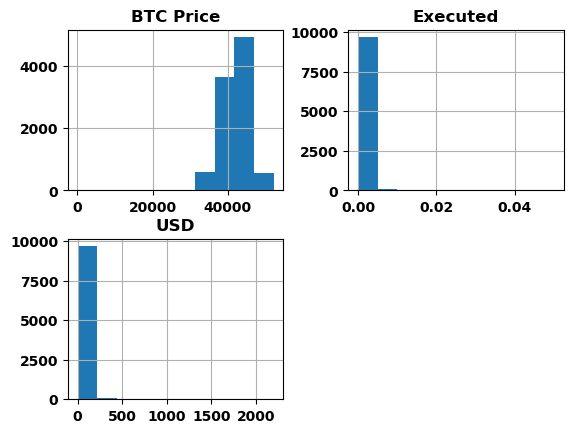

In [14]:
df.hist()

In [29]:
#BTC


# # Convert 'Time' column to datetime type
# df['Date'] = pd.to_datetime(df['Date'])

# # Sort DataFrame by 'Time' for better analysis
# df = df.sort_values(by='Time')

df['Executed'] = pd.to_numeric(df['Executed'], errors='coerce')

# Calculate total trade
total_trades = df.shape[0]

# Calculate average trade size
average_trade_size = df['Executed'].mean()


# Calculate total buys and sells
total_buys = df[df['Side'] == 'BUY']['Executed'].sum()
total_sells = df[df['Side'] == 'SELL']['Executed'].sum()

# Calculate total sell over buy
total_sell_over_buy = (df['Side'] == 'SELL').sum() - (df['Side'] == 'BUY').sum()



# Print the results
print(f'Total Trades: {total_trades}')
print(f'Average Trade Size: {average_trade_size}')
print(f'Total Buys: {total_buys}, Total Sells: {total_sells}')



Total Trades: 9742
Average Trade Size: 0.00046962943954013546
Total Buys: 2.2917, Total Sells: 2.28343


In [17]:
total_usd_buy = df[df['Side'] == 'BUY']['USD'].sum()
total_usd_sell = df[df['Side'] == 'SELL']['USD'].sum()

# Calculate total sell over buy
total_sell_over_buy = total_usd_sell - total_usd_buy

# Print the results
print(f'Total Trades: {total_trades}')
print(f'Average Trade Size: {average_trade_size}')
print(f'Total Buys BTC: {total_usd_buy}, Total Sells BTC: {total_usd_sell}, Total Sell Over Buy: {total_sell_over_buy}')

Total Trades: 9742
Average Trade Size: 0.00046962943954013546
Total Buys BTC: 95004.7969842, Total Sells BTC: 96983.9606997, Total Sell Over Buy: 1979.1637154999917


In [22]:
#Time Series

# # Convert 'Time' column to datetime type
# df['Date'] = pd.to_datetime(df['Date'])

# # Sort DataFrame by 'Time'
# df = df.sort_values(by='Date')

# Identify rows where 'Operation' is 'Buy' or 'Sell'
buy_sell_rows = df[df['Side'].isin(['BUY', 'SELL'])]

# Calculate the time difference between consecutive rows
buy_sell_rows['Time_Difference'] = buy_sell_rows['Date'].diff()

# Filter only the rows where 'Operation' is 'Buy'
buy_rows = buy_sell_rows[buy_sell_rows['Side'] == 'BUY']

# Calculate the average time difference for buys
average_time_between_buys = buy_rows['Time_Difference'].mean()

# Filter only the rows where 'Operation' is 'Buy'
sell_rows = buy_sell_rows[buy_sell_rows['Side'] == 'SELL']

# Calculate the average time difference for buys
average_time_between_sells = sell_rows['Time_Difference'].mean()

# Ave time between buy and sell
ave_time = average_time_between_buys - average_time_between_sells
 
print(f'Average Time Between Buy and Sell: {ave_time}')
print(f'Average Time Between Buys: {average_time_between_buys}')
print(f'Average Time Between Sells: {average_time_between_sells}')

Average Time Between Buy and Sell: 0 days 00:08:40.694840419
Average Time Between Buys: 0 days 00:20:07.183315954
Average Time Between Sells: 0 days 00:11:26.488475535


In [106]:

df.hvplot.line(x='Date', y='USD', by='Side', title='Red=USDT/USDC, Blue=Holding BTC', xlabel='Date', ylabel='USD', width=1200, height=800)

:NdOverlay   [Side]
   :Curve   [Date]   (USD)

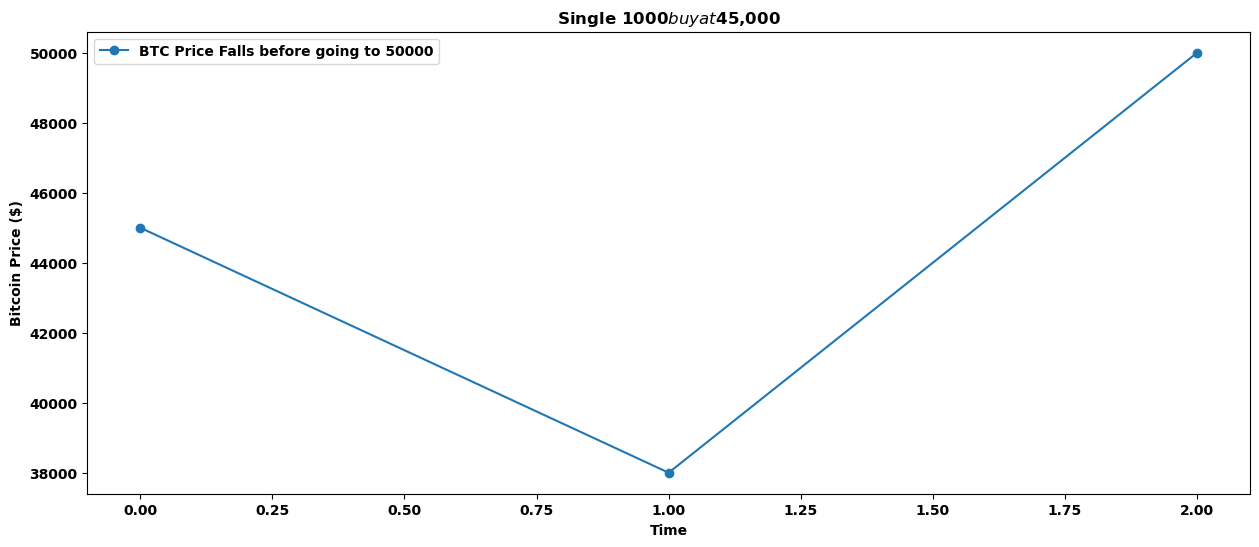

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Line 1: Single buy for $1000
initial_price_line1 = 45000
buy_amount_line1 = 1000
price_changes_line1 = [-7000, 12000]



# Generate time points for the plot
time_points = np.arange(len(price_changes_line1) + len(price_changes_line2) + 1)

# Generate prices for each line
prices_line1 = [initial_price_line1 + np.sum(price_changes_line1[:i]) for i in range(len(price_changes_line1) + 1)]


# Create subplots
fig, (ax1) = plt.subplots(1, figsize=(15, 6))

# Plot Line 1
ax1.plot(time_points[:len(prices_line1)], prices_line1, label='BTC Price Falls before going to 50000', marker='o')
ax1.set_title('Single $1000 buy at $45,000')
ax1.set_xlabel('Time')
ax1.set_ylabel('Bitcoin Price ($)')


# Add legend
ax1.legend()


# Show the subplots
plt.show()


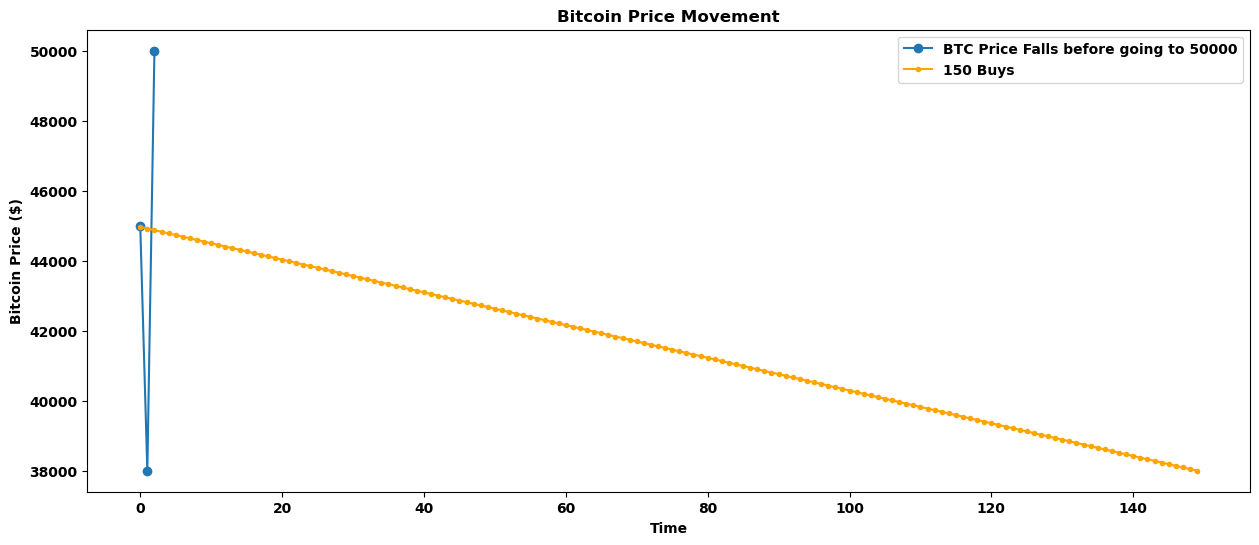

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Line 1: Single buy for $1000
initial_price_line1 = 45000
price_changes_line1 = [-7000, 12000]
initial_price_line2 = 52000
price_changes_line2 = [-7000]

# Generate time points for the plot
num_points = 150
price_changes_pattern = np.linspace(-33, -7000, num_points)  # Adjusted to cover the range from 45000 to 38000
time_points = np.arange(len(price_changes_line1) + num_points + 1)

# Generate prices for each line
prices_line1 = [initial_price_line1 + np.sum(price_changes_line1[:i]) for i in range(len(price_changes_line1) + 1)]
prices_line1_extended = [initial_price_line2 + np.sum(price_changes_line2) + change for change in price_changes_pattern]

# Create subplot
fig, ax = plt.subplots(figsize=(15, 6))  # Adjusted the figsize to make the graph wider

# Plot Line 1
ax.plot(time_points[:len(prices_line1)], prices_line1, label='BTC Price Falls before going to 50000', marker='o')
ax.plot(time_points[:len(prices_line1_extended)], prices_line1_extended, label='150 Buys', marker='o', markersize=3, color='orange')  # Adjusted markersize
ax.set_title('Bitcoin Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Bitcoin Price ($)')
ax.legend()

# Show the plot
plt.show()


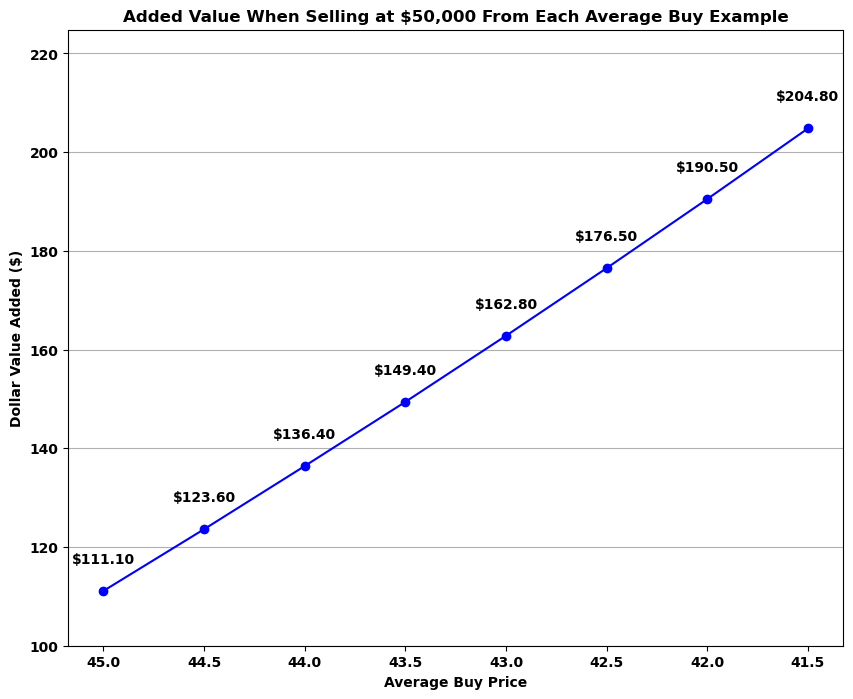

In [128]:
import matplotlib.pyplot as plt

# Data
buy_numbers = [45, 44.5, 44, 43.5, 43, 42.5, 42, 41.5]
percentage_gains = [11.11, 12.36, 13.64, 14.94, 16.28, 17.65, 19.05, 20.48]
investment = 1000

# Calculate Dollar Value Added for each buy
dollar_value_added = [gain / 100 * investment for gain in percentage_gains]

# Increase the height of the graph
plt.figure(figsize=(10, 8))

# Plotting as a line plot with markers
plt.plot(buy_numbers, dollar_value_added, marker='o', linestyle='-', color='blue')
plt.xlabel('Average Buy Price')
plt.ylabel('Dollar Value Added ($)')
plt.title('Added Value When Selling at $50,000 From Each Average Buy Example')

# Display the values on top of the markers
for x, y in zip(buy_numbers, dollar_value_added):
    plt.text(x, y + 5, f"${y:.2f}", ha='center', va='bottom')

plt.grid(axis='y')

# Reverse the x-axis
plt.gca().invert_xaxis()

# Adjust y-axis limits
plt.ylim(100, max(dollar_value_added) + 20)

plt.show()


In [129]:
#get average buy price
#get average sell price

import pandas as pd

# Filter rows for BUY and SELL separately
buy_df = df[df['Side'] == 'BUY']
sell_df = df[df['Side'] == 'SELL']

# Calculate the average buy price and sell price
average_buy_price = buy_df['BTC Price'].mean()
average_sell_price = sell_df['BTC Price'].mean()

print(f"Average Buy Price: {average_buy_price}")
print(f"Average Sell Price: {average_sell_price}")


Average Buy Price: 41208.3635029191
Average Sell Price: 41452.27294379297


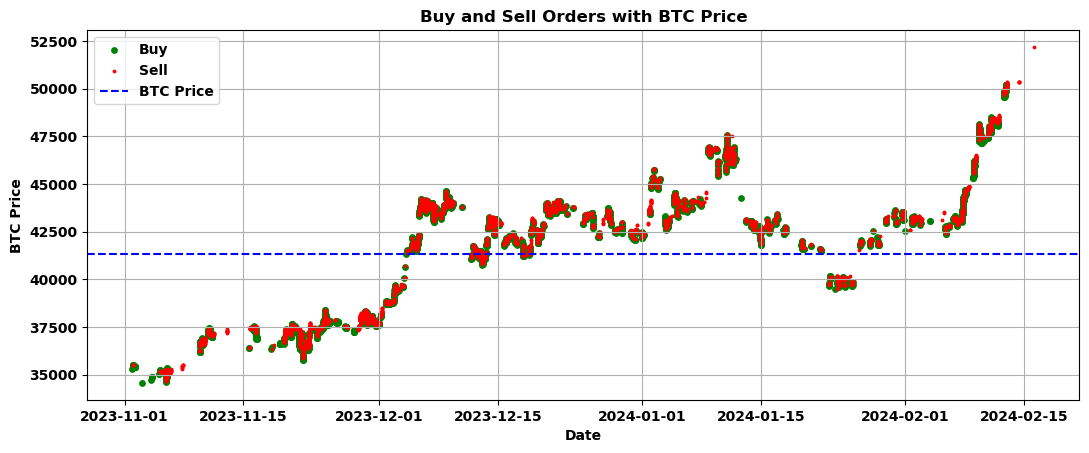

In [158]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter rows for BUY and SELL separately and based on BTC price conditions
buy_df = df[(df['Side'] == 'BUY') & (df['BTC Price'] > 30000) & (df['BTC Price'] < 55000)]
sell_df = df[(df['Side'] == 'SELL') & (df['BTC Price'] > 30000) & (df['BTC Price'] < 55000)]

# Double the current width
fig, ax = plt.subplots(figsize=(2 * plt.rcParams['figure.figsize'][0], plt.rcParams['figure.figsize'][1]))

# Plot the buys and sells with BTC price as the y-axis
plt.scatter(buy_df['Date'], buy_df['BTC Price'], color='green', label='Buy', marker='o', s=15)
plt.scatter(sell_df['Date'], sell_df['BTC Price'], color='red', label='Sell', marker='o', s=3)

# Plot the BTC price line
plt.axhline(y=df['BTC Price'].mean(), color='blue', linestyle='--', label='BTC Price')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.title('Buy and Sell Orders with BTC Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


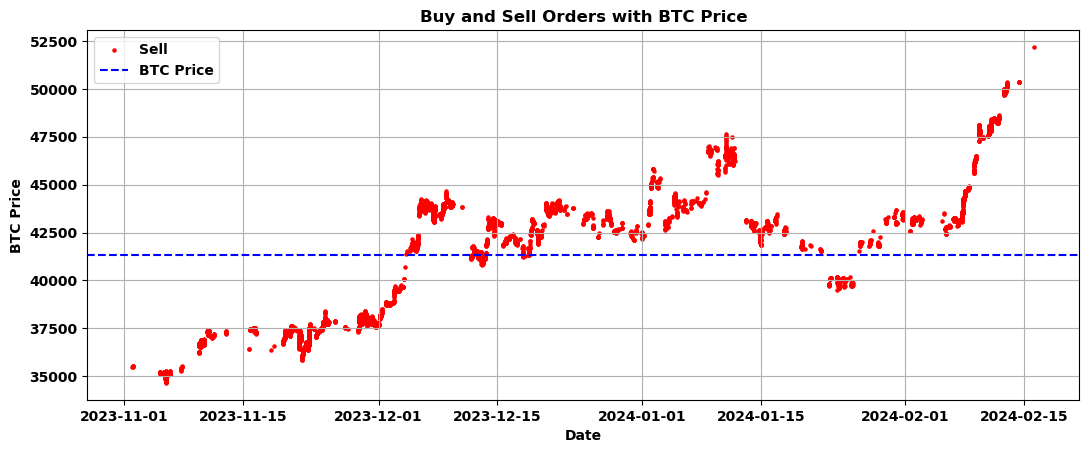

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter rows for BUY and SELL separately
buy_df = df[df['Side'] == 'BUY']
sell_df = df[df['Side'] == 'SELL']

# Double the current width
fig, ax = plt.subplots(figsize=(2 * plt.rcParams['figure.figsize'][0], plt.rcParams['figure.figsize'][1]))

# Plot the buys and sells with BTC price as the y-axis
# plt.scatter(buy_df['Date'], buy_df['BTC Price'], color='green', label='Buy', marker='o')
plt.scatter(sell_df['Date'], sell_df['BTC Price'], color='red', label='Sell', marker='o', s=5)

# Plot the BTC price line
plt.axhline(y=df['BTC Price'].mean(), color='blue', linestyle='--', label='BTC Price')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.title('Buy and Sell Orders with BTC Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
